In [98]:
from typing import Tuple, Optional
import numpy as np
import matplotlib.pyplot as plt
import skimage
from PIL import Image, ImageDraw

1000 200
[[0. 0.]
 [2. 1.]]
[[   0    0]
 [1000  400]]
[0 0] [1000  400]


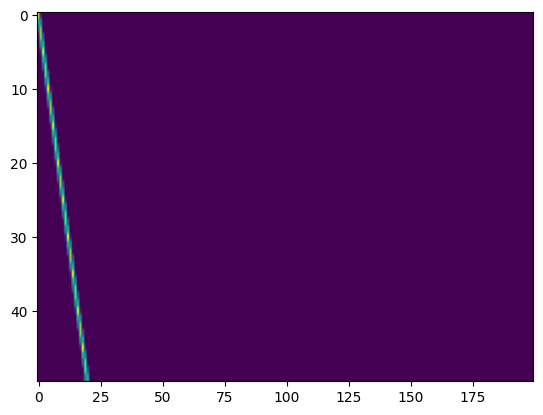

In [115]:
def keypoints_to_activation(
    keypoints: np.ndarray,
    shape: Tuple[int, int],
    t_scale: Optional[float] = None,
    tau_scale: Optional[float] = None,
) -> np.ndarray:
    img = np.zeros(shape)

    if t_scale is None:
        t_scale = shape[1] / keypoints.max(axis=0)[1]
    print(t_scale, tau_scale)

    scaled_keypoints = np.flip(keypoints.copy(), axis=1)
    scaled_keypoints[:, 0] *= t_scale
    scaled_keypoints[:, 1] *= tau_scale
    scaled_keypoints = scaled_keypoints.astype(int)
    print(keypoints)
    print(scaled_keypoints)

    # Draw lines between consecutive keypoints
    for p1, p2 in zip(scaled_keypoints[:-1], scaled_keypoints[1:]):
        print(p1, p2)
        rr, cc, val = skimage.draw.line_aa(p1[0], p1[1], p2[0], p2[1])
        valid_coords = (rr >= 0) & (rr < shape[0]) & (cc >= 0) & (cc < shape[1])
        img[rr[valid_coords], cc[valid_coords]] = val[valid_coords]

    # Convert the image to a numpy array
    ret = np.array(img)
    return ret


keypoints = np.array([(0.0, 0), (2, 1)])
H = keypoints_to_activation(keypoints, (50, 200), 100, 200)
plt.imshow(H, aspect="auto")

[((99, 99), (66, 0)), ((99, 98), (92, 76)), ((37, 16), (67, 0)), ((34, 19), (11, 7)), ((76, 32), (66, 2)), ((29, 16), (0, 0)), ((34, 18), (55, 7))]


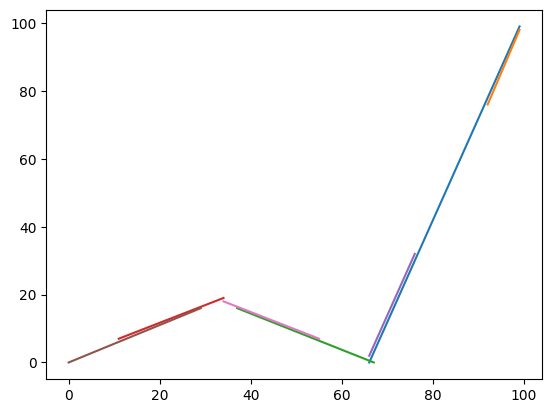

In [52]:
lines = skimage.transform.probabilistic_hough_line(
    H, threshold=20, line_length=20, line_gap=0
)
print(lines)
for line in lines:
    p0, p1 = line
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]))

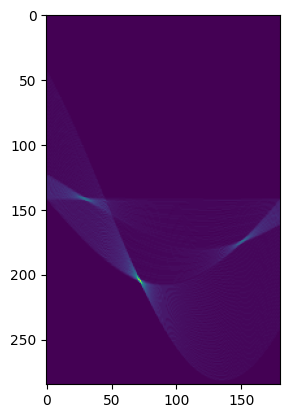

In [48]:
hspace, angles, distances = skimage.transform.hough_line(H)
plt.imshow(hspace)